In [8]:
# Question 1: Load the dataset into a pandas DataFrame. Display the first 10 rows of the dataset.Describe the dataset by listing all the columns and their data types.
import pandas as pd
url = "/content/eda_payroll_dataset_batch2 - Sheet1.csv"
df = pd.read_csv(url)
print(df.head(10))
print(df.dtypes)

  Employee_ID     Name   Department   Position  Base_Salary    Bonus  \
0       E0001    Grace           HR   Engineer          NaN  4163.33   
1       E0002    David           HR   Engineer     65764.33  9394.54   
2       E0003      Eva           HR   Engineer     38406.72  5648.91   
3       E0004    Grace    Marketing  Executive     69696.49  9426.69   
4       E0005  Charlie        Sales    Manager     47604.83  2594.60   
5       E0006   Hannah    Marketing    Analyst     46805.10  7394.40   
6       E0007      Eva        Sales      Clerk     38463.25  6363.87   
7       E0008      Eva    Marketing    Analyst     62100.39  7524.38   
8       E0009    Grace    Marketing    Analyst     98173.37  2539.34   
9       E0010      Bob  Engineering    Manager     54879.75  6817.45   

   Overtime_Hours  Overtime_Pay  Tax_Deductions  Net_Salary  
0            19.0       4380.96         4613.84    74583.16  
1            49.0       3613.92        11611.08    67161.71  
2            42.0    

In [9]:
# Question 2: Calculate and display the summary statistics (mean, median, mode, standard deviation, etc.) for all numeric columns in the dataset. Identify any insights from these summary statistics.
summary_stats = df.describe()
print(summary_stats)

         Base_Salary        Bonus  Overtime_Hours  Overtime_Pay  \
count     799.000000   810.000000      896.000000    920.000000   
mean    78035.855594  5268.840037       24.863839   2500.626250   
std     36142.587414  2726.964633       14.059705   1428.004028   
min     30016.960000   512.790000        0.000000     10.380000   
25%     51702.205000  2907.430000       13.000000   1276.012500   
50%     77453.870000  5313.710000       24.000000   2522.685000   
75%     98615.635000  7623.840000       37.000000   3732.297500   
max    344143.560000  9977.420000       49.000000   4995.250000   

       Tax_Deductions     Net_Salary  
count      905.000000    1000.000000  
mean     15251.390055   67947.263400  
std       8402.407227   27890.284223  
min       1018.200000    4428.430000  
25%       7979.770000   45452.717500  
50%      15428.350000   68887.255000  
75%      22124.250000   90716.725000  
max      29995.630000  125430.250000  


In [10]:
# Question 3: Identify any columns that have missing values. Calculate the percentage of missing values in each of these columns.
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_info[missing_info['Missing Values'] > 0])

                Missing Values  Percentage
Base_Salary                201        20.1
Bonus                      190        19.0
Overtime_Hours             104        10.4
Overtime_Pay                80         8.0
Tax_Deductions              95         9.5


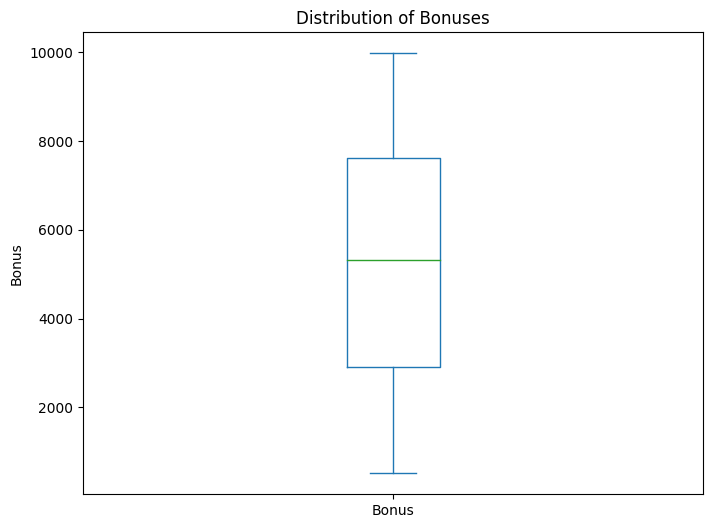

In [19]:
# Question 5: Generate a box plot for the 'Bonus' column. Identify any outliers and describe how they could affect the analysis.
import matplotlib.pyplot as pl
plt.figure(figsize=(8, 6))
df['Bonus'].plot(kind='box')
plt.ylabel('Bonus')
plt.title('Distribution of Bonuses')
plt.show()

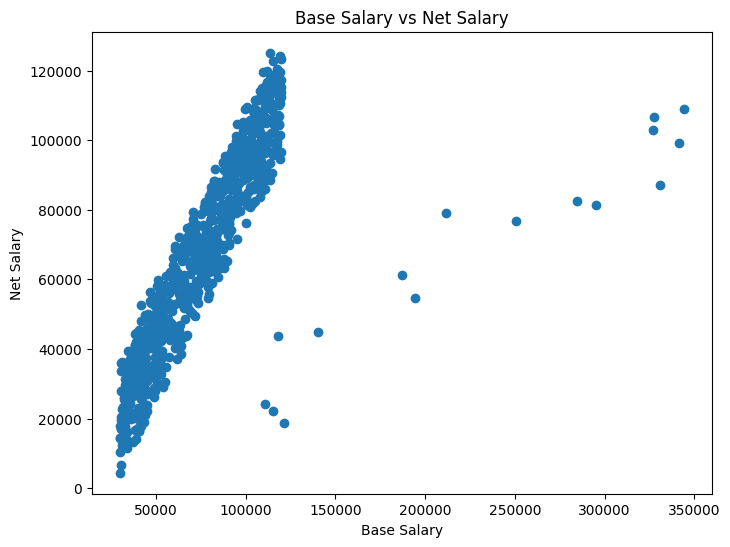

In [13]:
# Question 6: Create a scatter plot to visualize the relationship between 'Base_Salary' and 'Net_Salary'. Describe the relationship between these two variables.plt.figure(figsize=(8, 6))
plt.scatter(df['Base_Salary'], df['Net_Salary'])
plt.xlabel('Base Salary')
plt.ylabel('Net Salary')
plt.title('Base Salary vs Net Salary')
plt.show()

In [14]:

numeric_columns = ['Base_Salary', 'Bonus', 'Overtime_Hours', 'Overtime_Pay', 'Tax_Deductions', 'Net_Salary']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

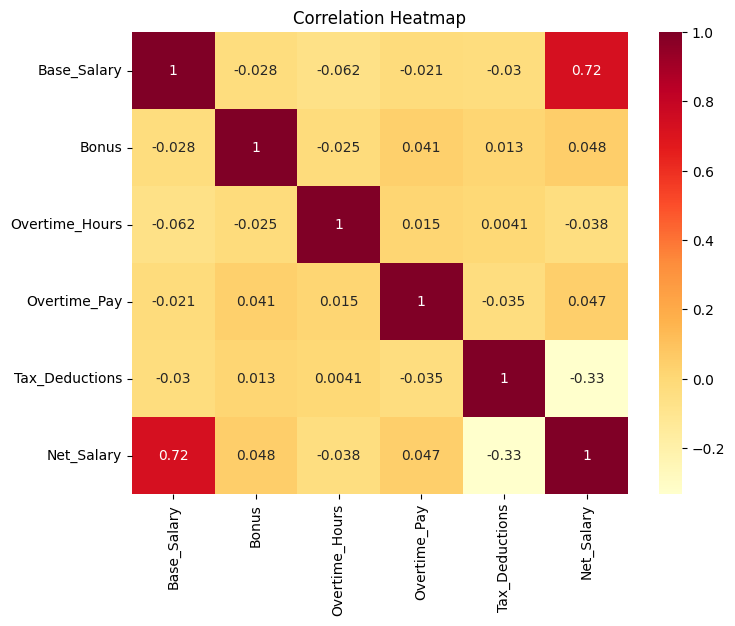

In [15]:
# Question 7: Generate a heatmap to show the correlation between all numeric variables in the dataset. Which variables are most strongly correlated?
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

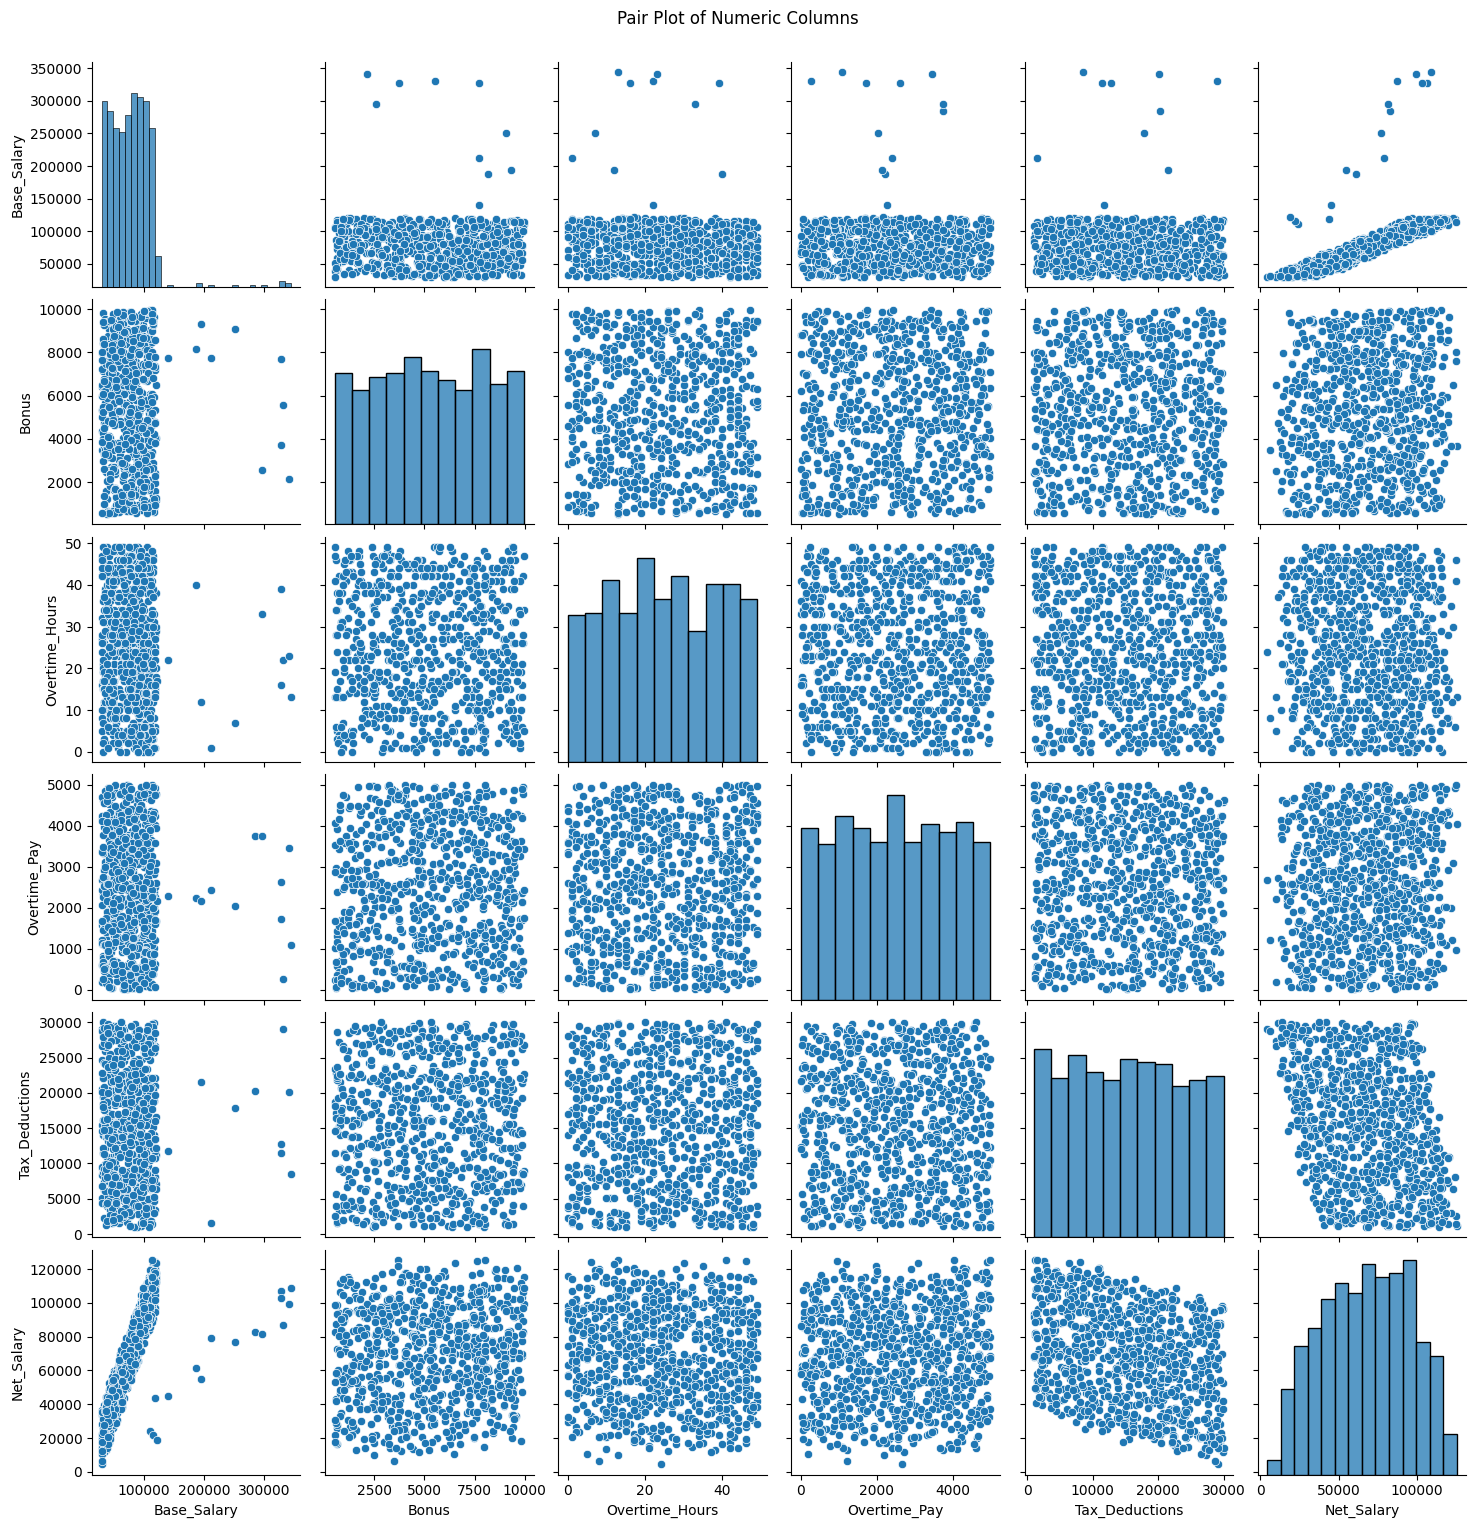

In [17]:
# Question 8: Create a pair plot for the numeric columns in the dataset. What patterns or trends can you identify from the pair plot?
import seaborn as sns
sns.pairplot(df[numeric_columns])
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

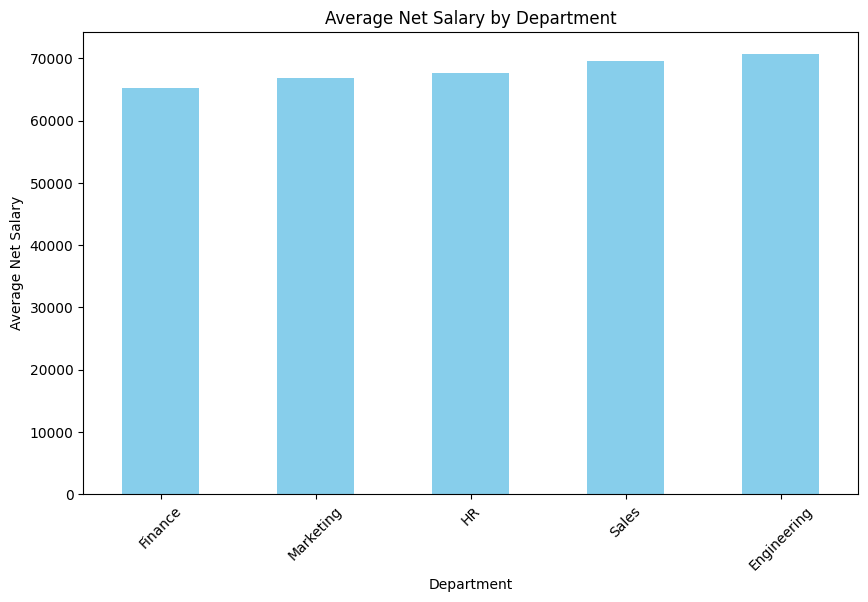

In [20]:
# Question 9: Generate a bar plot showing the average 'Net_Salary' for each 'Department' in the dataset. What conclusions can you draw about the salary distribution across different departments?
avg_net_salary_by_dept = df.groupby('Department')['Net_Salary'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_net_salary_by_dept.plot(kind='bar', color='skyblue')
plt.xlabel('Department')
plt.ylabel('Average Net Salary')
plt.title('Average Net Salary by Department')
plt.xticks(rotation=45)
plt.show()

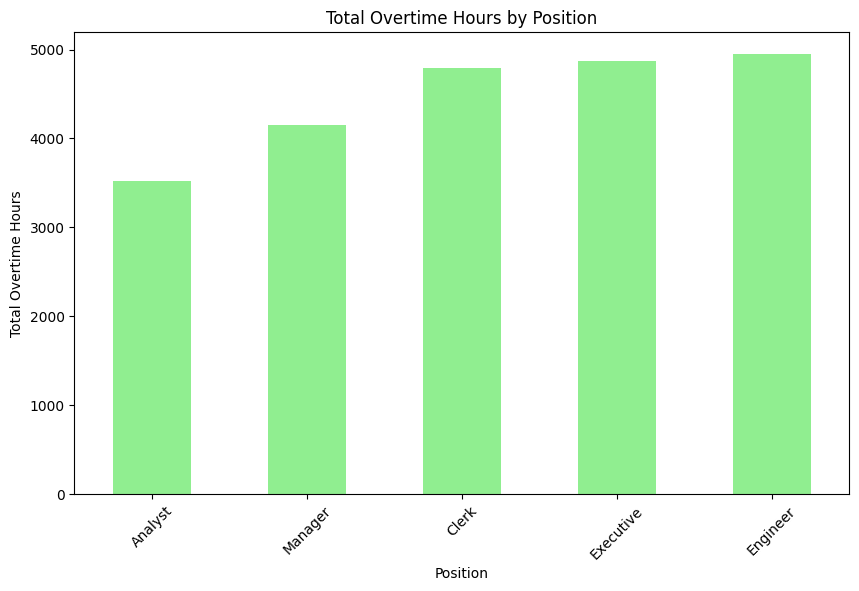

In [21]:
# Question 10: Perform a group-by operation to find the total 'Overtime_Hours' for each 'Position&#39;. Visualize this data using a bar chart and discuss any significant findings.
total_overtime_by_position = df.groupby('Position')['Overtime_Hours'].sum().sort_values()
plt.figure(figsize=(10, 6))
total_overtime_by_position.plot(kind='bar', color='lightgreen')
plt.xlabel('Position')
plt.ylabel('Total Overtime Hours')
plt.title('Total Overtime Hours by Position')
plt.xticks(rotation=45)
plt.show()